52884  start to plot


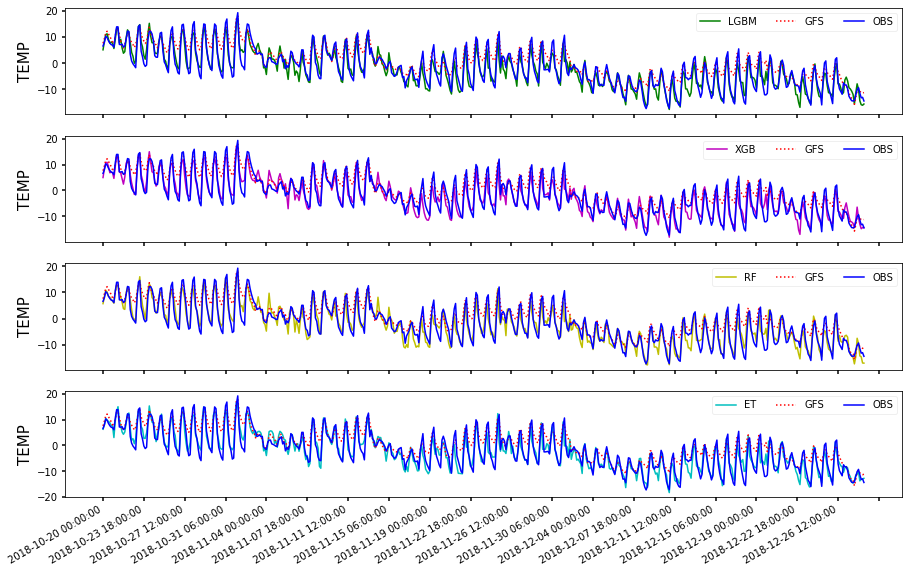

In [1]:
from pyecharts import options as opts
from pyecharts.charts import Line, Bar, Grid
from config.base_config import * 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


for sid in SID_TODO:
    print(sid,' start to plot')
    for model_name in ['LGBM']: 
        name=sid+'_'+model_name+'_curve_data.csv'               
        file_tmp= pd.read_csv(name, sep=',')
        df_tmp=pd.DataFrame(file_tmp)
        date_df = pd.DataFrame(df_tmp['time'],columns=['time'])
        #date_df['time']=pd.DatetimeIndex(date_df['time'])
        #print(date_df.info())
    for model_name in ["LGBM","ET", "XGB",  "RF"]:
        name=sid+'_'+model_name+'_curve_data.csv'
        file_tmp= pd.read_csv(name, sep=',')
        df_tmp=pd.DataFrame(file_tmp)
        #print(df_file)
        date_df = pd.merge(date_df,df_tmp,how='left')
    #print(date_df.columns)
    date_df=date_df.drop('Unnamed: 0',axis=1)
    #print(date_df)        


    time_data = date_df['time'] # X轴
    lgb = date_df['LGBM']  # 数据
    xgb= date_df['XGB']  # 数据
    rf= date_df['RF']  # 数据
    et= date_df['ET']  # 数据
    gfs= date_df['GFS']  # 数据
    true = date_df['TARGET']  # 数据
    


    #开始画图
    fig = plt.figure(figsize=(15,10))
    #plt.title('Result comparison')
    ax1 = fig.add_subplot(411)
    ax2 = fig.add_subplot(412)
    ax3 = fig.add_subplot(413)
    ax4 = fig.add_subplot(414)
    #l1,=ax2.plot(time_data, xgb,'g-o',linewidth=2.5) #颜色线型，标记
    
    l1,=ax1.plot(time_data, lgb,'g-',linewidth=1.5)
    l2,=ax1.plot(time_data, gfs,'r:', linewidth=1.5)
    l3,=ax1.plot(time_data, true,'b-', linewidth=1.5)
    ax1.legend(handles=[l1,l2,l3], labels=['LGBM','GFS','OBS'], loc=1, prop={'size': 10}, ncol=3, framealpha=0.3)
    ax1.tick_params(labelcolor='k', labelsize='10', width=1.5)
    ax1.set_ylabel("TEMP",fontsize=15)
    ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(30))#设定坐标轴的显示的刻度间隔
    l1,=ax2.plot(time_data, xgb,'m-',linewidth=1.5)
    l2,=ax2.plot(time_data, gfs,'r:', linewidth=1.5)
    l3,=ax2.plot(time_data, true,'b-', linewidth=1.5)
    ax2.legend(handles=[l1,l2,l3], labels=['XGB','GFS','OBS'], loc=1, prop={'size': 10}, ncol=3, framealpha=0.3)
    ax2.tick_params(labelcolor='k', labelsize='10', width=1.5)
    ax2.set_ylabel("TEMP",fontsize=15)
    ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(30))#设定坐标轴的显示的刻度间隔
    l1,=ax3.plot(time_data, rf,'y-', linewidth=1.5)
    l2,=ax3.plot(time_data, gfs,'r:', linewidth=1.5)
    l3,=ax3.plot(time_data, true,'b-', linewidth=1.5)
    ax3.legend(handles=[l1,l2,l3], labels=['RF','GFS','OBS'], loc=1, prop={'size': 10}, ncol=3, framealpha=0.3)
    ax3.tick_params(labelcolor='k', labelsize='10', width=1.5)
    ax3.set_ylabel("TEMP",fontsize=15)
    ax3.xaxis.set_major_locator(mpl.ticker.MultipleLocator(30))#设定坐标轴的显示的刻度间隔
    l1,=ax4.plot(time_data, et,'c-',linewidth=1.5)
    l2,=ax4.plot(time_data, gfs,'r:', linewidth=1.5)
    l3,=ax4.plot(time_data, true,'b-', linewidth=1.5)
    ax4.legend(handles=[l1,l2,l3], labels=['ET','GFS','OBS'], loc=1, prop={'size': 10}, ncol=3, framealpha=0.3)
    ax4.tick_params(labelcolor='k', labelsize='10', width=1.5)
    ax4.set_ylabel("TEMP",fontsize=15)
    ax4.xaxis.set_major_locator(mpl.ticker.MultipleLocator(30))#设定坐标轴的显示的刻度间隔
    #
    fig.autofmt_xdate()#防止x轴上的数据重叠，自动调整
    
    #plt.legend() # 显示图例
    
    
    #plt.xlabel('time')
    #plt.ylabel('temperature')
    plt.savefig(sid+"_plot.png",dpi=100)
    
    
    plt.show()
    
